In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from prettytable import PrettyTable

In [5]:
url = 'https://www.mohfw.gov.in/'
# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content
# parse the html content
soup = BeautifulSoup(web_content, "html.parser")
# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
# find all table rows and data cells within
stats = [] 
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_contents(row.find_all('td')) 
# notice that the data that we require is now a list of length 5
    if len(stat) == 5:
        stats.append(stat)
#now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.head()

,Sr.No,States/UT,Confirmed,Recovered,Deceased
0,1,Andaman and Nicobar Islands,33,33,0
1,2,Andhra Pradesh,1980,925,45
2,3,Arunachal Pradesh,1,1,0
3,4,Assam,63,34,2
4,5,Bihar,696,365,6


In [47]:
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased'] = state_data['Deceased'].map(int)

In [48]:
table = PrettyTable()
table.field_names = (new_cols)

In [49]:
for i in stats:
    table.add_row(i)
    confirmed = sum(state_data['Confirmed'])
    recovered = sum(state_data['Recovered'])
    deceased  = sum(state_data['Deceased'])

table.add_row(["","Total", confirmed, recovered, deceased])

In [50]:
print(table)

+-------+-----------------------------+-----------+-----------+----------+
| Sr.No |          States/UT          | Confirmed | Recovered | Deceased |
+-------+-----------------------------+-----------+-----------+----------+
|   1   | Andaman and Nicobar Islands |     33    |     33    |    0     |
|   2   |        Andhra Pradesh       |    1980   |    925    |    45    |
|   3   |      Arunachal Pradesh      |     1     |     1     |    0     |
|   4   |            Assam            |     63    |     34    |    2     |
|   5   |            Bihar            |    696    |    365    |    6     |
|   6   |          Chandigarh         |    169    |     24    |    2     |
|   7   |         Chhattisgarh        |     59    |     49    |    0     |
|   8   |      Dadar Nagar Haveli     |     1     |     0     |    0     |
|   9   |            Delhi            |    6923   |    2069   |    73    |
|   10  |             Goa             |     7     |     7     |    0     |
|   11  |           Gujar

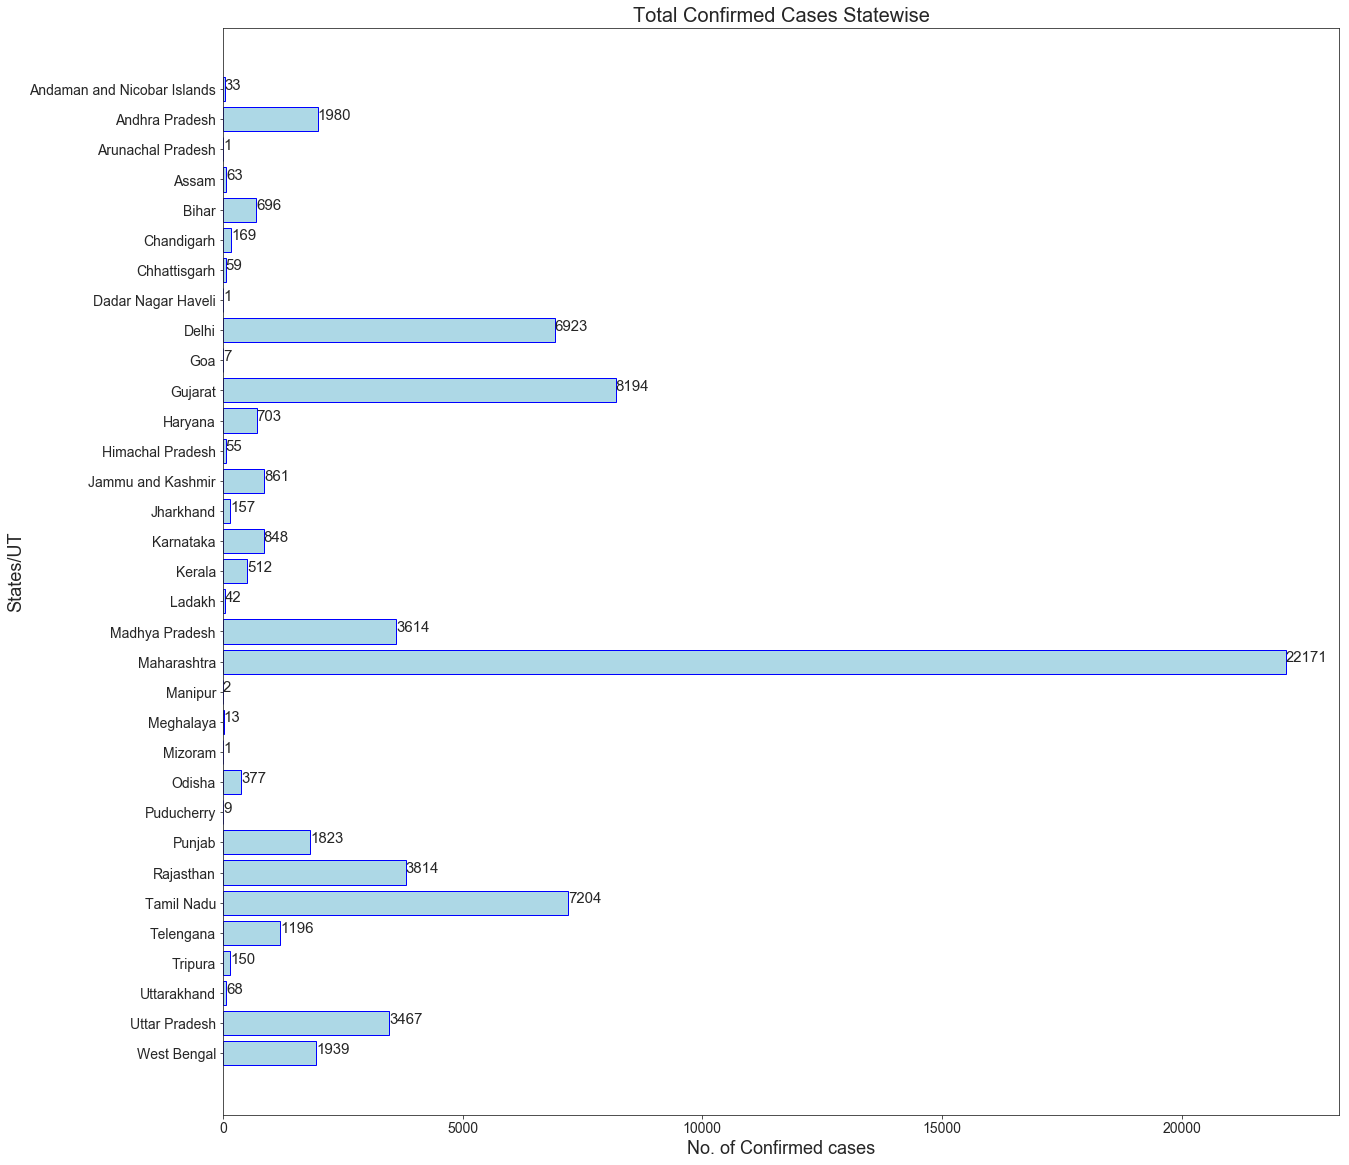

In [51]:
sns.set_style("ticks")
plt.figure(figsize = (20,20))
plt.barh(state_data["States/UT"],    state_data["Confirmed"].map(int),align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 20 )
for index, value in enumerate(state_data["Confirmed"]):
    plt.text(value, index, str(value), fontsize = 15)
plt.show()

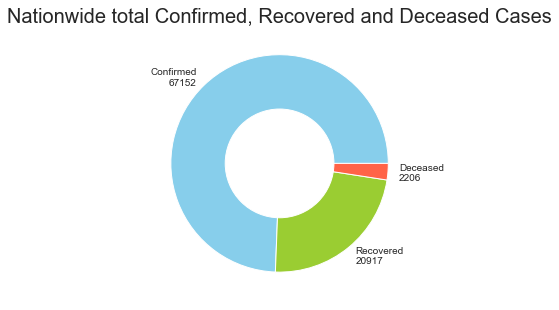

In [39]:
group_size = [sum(state_data['Confirmed']),
              sum(state_data['Recovered']),
              sum(state_data['Deceased'])]
group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])),
                'Recovered\n' + str(sum(state_data['Recovered'])),
                'Deceased\n' + str(sum(state_data['Deceased']))]
custom_colors = ['skyblue','yellowgreen','tomato']
plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12)
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 20)
plt.show()